# Figure 01
## FOXSI3 Instrumentation Milo's paper
https://v2.overleaf.com/read/wcfwdbgdfgcc
### October 2018
### Milo BC @ UC Berkeley

## Goal:
***First figure should show several plots starting from on-axis and moving off-axis to show how the ghost ray pattern emerges and changes as the sources moves further off-axis. (Do not color the Ghost Rays!) With a source at 1 AU.***

This plot needs to have the latest optics configuration regarding blocker sizes. Also, since 4 out of the 7 modules are 10-shell optics, this figure should show Ghost Rays for one of those 10 shell modules.

<div class="alert alert-info">
I need to ran for a 10-shell module with blocker sizes of: <br/>
Front = 3.09671cm and <br/>
Rear = 2.62cm <br/>
rays are saved in my laptop inside: <br/>
/Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262<br/>
No energy dependance.
</div>

In [2]:
## General packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
## Specific packages
from foxsisim.util import load_rays
from foxsisim.detector import Detector

In [14]:
## Rays location:
rays_folder = '/Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/'
## 10-Shell FOXSI rocket optics
fbr = 3.09671
rbr = 2.62
offaxisAngles = np.arange(0.0,33.,4.) # Off-Axis Angles

## Creating empty lists:
All_Drays, All_Hrays, All_Prays, All_Srays = [], [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []
All_Sx, All_Sy = [], []

for angle in offaxisAngles:
    # Loading Rays:
    Lrays = load_rays(rays_folder+'rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Lrays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Lrays)
    '''Defining D, H, and P rays'''
    Drays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==2 )]
    Srays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 )]
    Hrays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Lrays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays)
    All_Srays.append(Srays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    
    # StraightThrough
    Sx, Sy = [], []
    for ray in Srays:
        Sx.append(ray.pos[0]*sim_scale)
        Sy.append(ray.pos[1]*sim_scale)
    All_Sx.append(Sx)
    All_Sy.append(Sy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/rays_Angle_=_16.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/rays_Angle_=_20.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/rays_Angle_=_24.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_FOXSI_Science/Paper_figures/rays/F309R262/rays_Angle_=_28.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/D

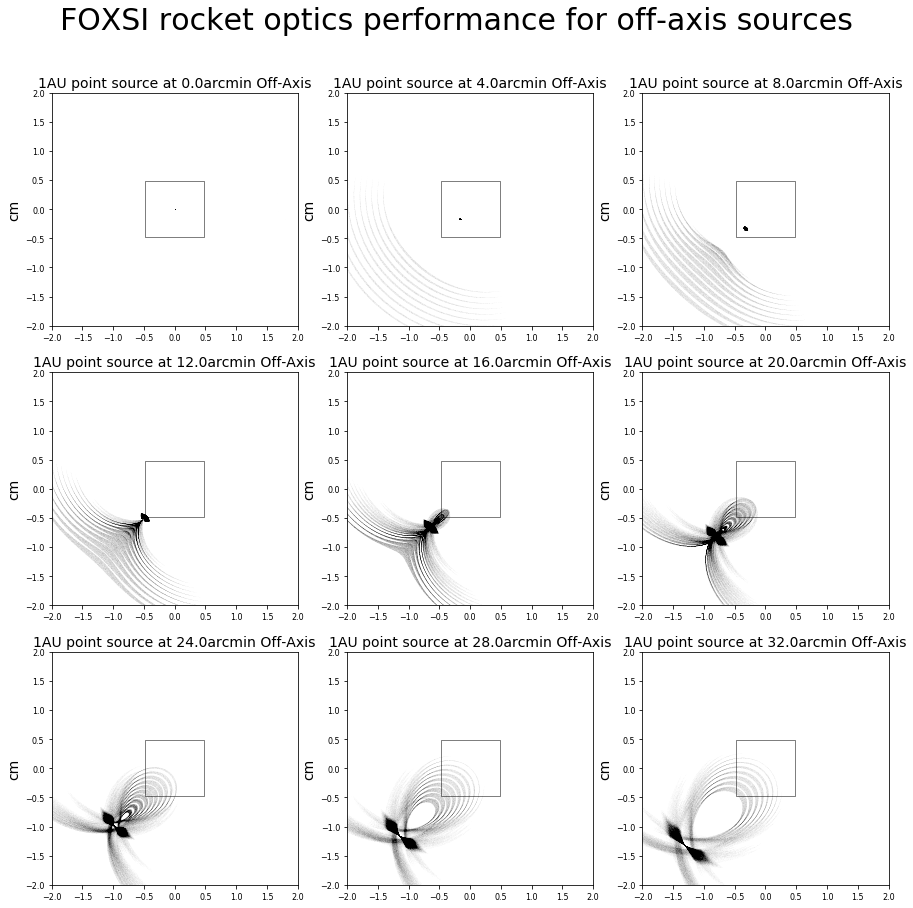

In [15]:
fig = plt.figure(figsize=(15,30))
st = fig.suptitle("FOXSI rocket optics performance for off-axis sources", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(6,3,i+1)
    plt.title('1AU point source at '+str(angle)+'arcmin Off-Axis',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='black',s=0.00001,alpha=0.7)
    plt.scatter(All_Px[i],All_Py[i],color='black',s=0.00001,alpha=0.7)
    plt.scatter(All_Dx[i],All_Dy[i],color='black',s=0.00001,alpha=0.7)
    plt.ylim(-2.0,2.0)
    plt.xlim(-2.0,2.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.48,-0.48),0.96,0.96,fill=False,linewidth=0.5))
    #ax.add_patch(patches.Circle((0,0),np.sqrt(0.48),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [13]:
np.arange(0.0,33.,4.)

array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32.])